In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [66]:
data=pd.read_csv("C:/Users/SRISTI/Desktop/practice text doc/avocado_p.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [67]:
data.drop('Unnamed: 0',axis=1,inplace=True)       # drop because it is same as index number.

In [68]:
data.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [69]:
ds=data.copy()

## EDA

In [70]:
ds.shape

(18249, 13)

dataset has 18249 rows and 13 columns.

In [71]:
ds.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [72]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [73]:
ds.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no null value in this dataset.

In [74]:
ds.type.unique()

array(['conventional', 'organic'], dtype=object)

In [75]:
ds.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [76]:
ds.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [77]:
ds.region.nunique()

54

There are 54 different regions of observation.

Feature Engineering in Date column so that we can extract month and day, year is given already so only month and day.

In [78]:
ds['Date']=pd.to_datetime(ds['Date'])
ds['Month']=ds['Date'].apply(lambda x:x.month)
ds['Day']=ds['Date'].apply(lambda x:x.day)

In [79]:
ds.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [80]:
ds.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Month                    int64
Day                      int64
dtype: object

In [81]:
ds.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


Maximum column have min value as zero.
maximum column have mean and std very close to each other.
there are large difference between 75% and max value in almost all the columns, means there may be outliers are present, we can talk about it later.

### Univariate Analysis

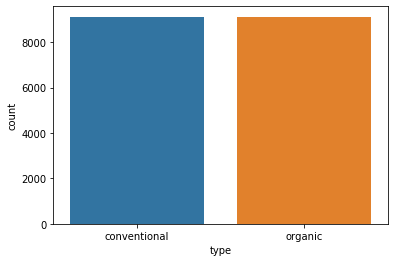

In [82]:
sns.countplot(ds['type'])

there are two types of avocado present that is conventional and organic.

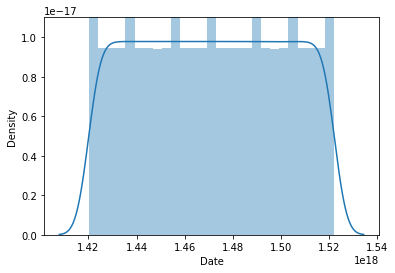

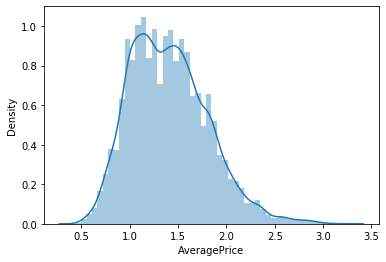

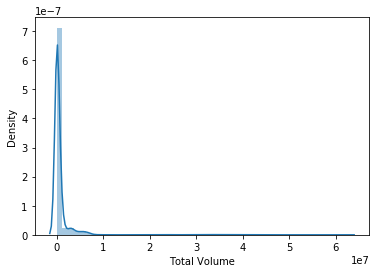

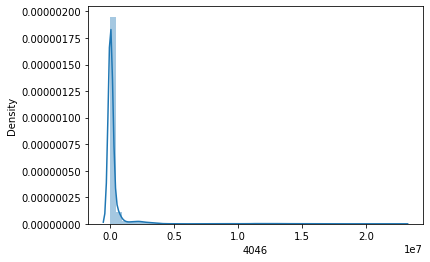

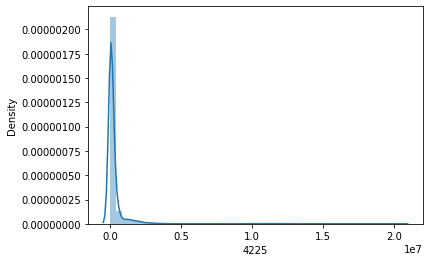

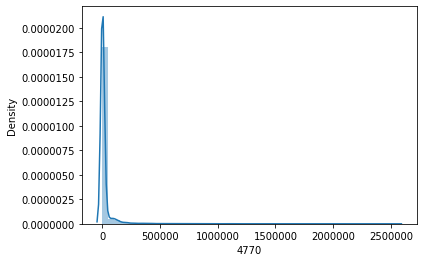

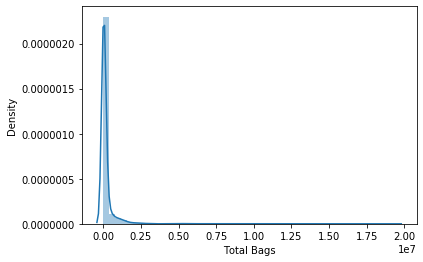

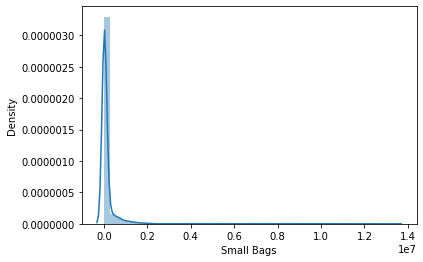

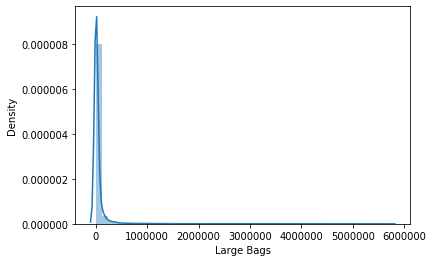

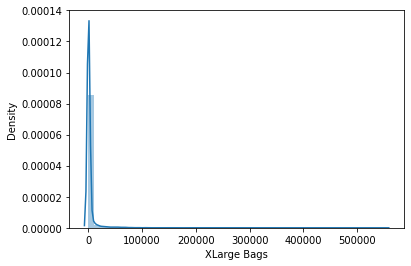

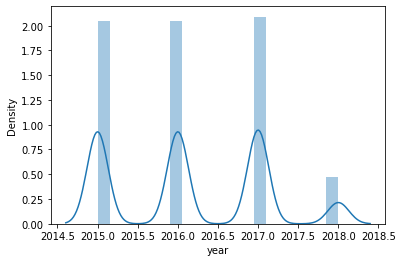

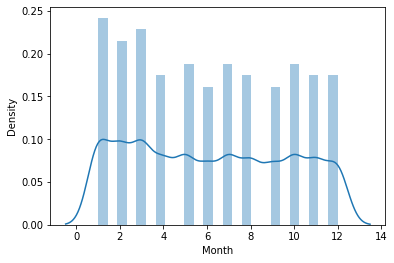

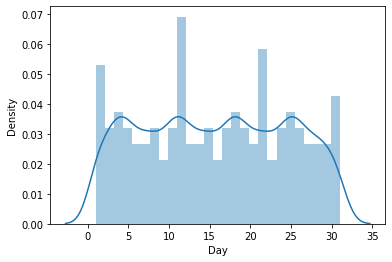

In [83]:
for i in ds.columns:
    if ds[i].dtypes!='object':
        sns.distplot(ds[i])
        plt.show()

AveragePrice is quite normally distributed.
All other columns are rightly skewed.
We can take care of it later.

### Bivariate Analysis

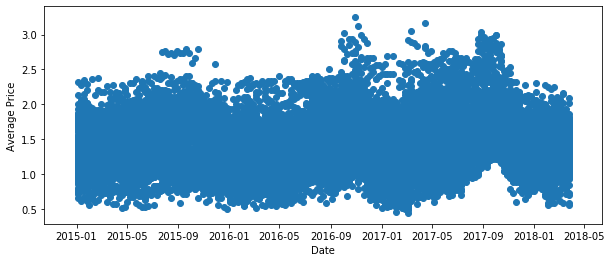

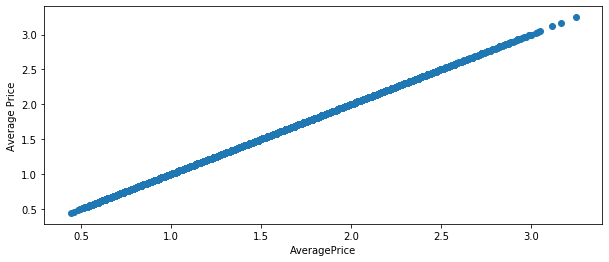

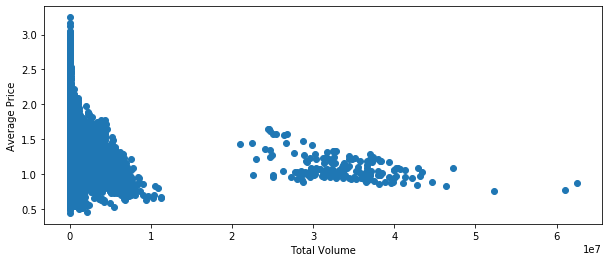

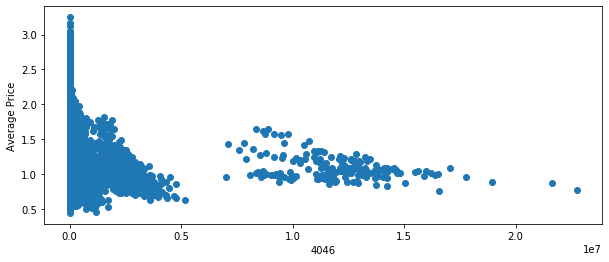

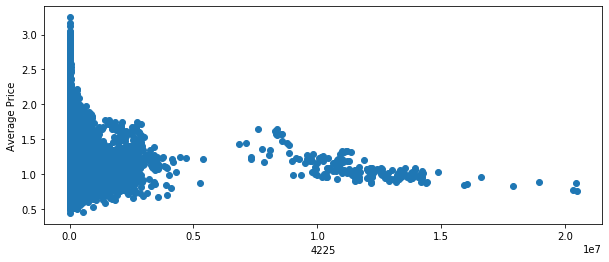

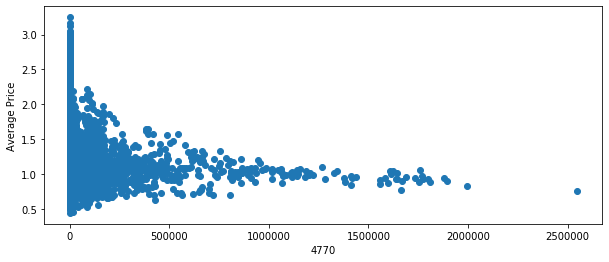

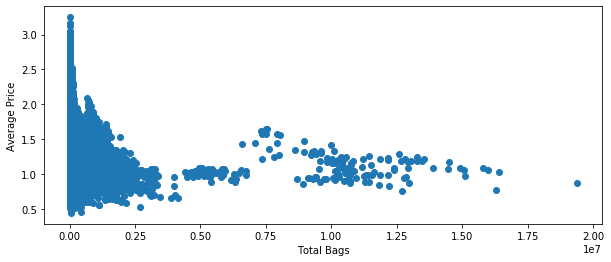

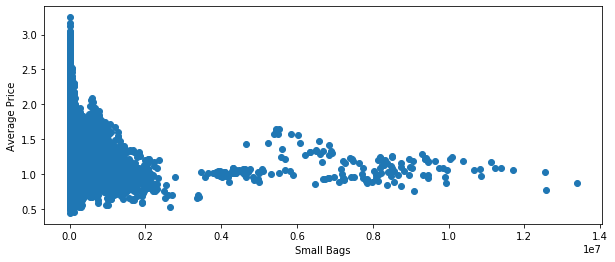

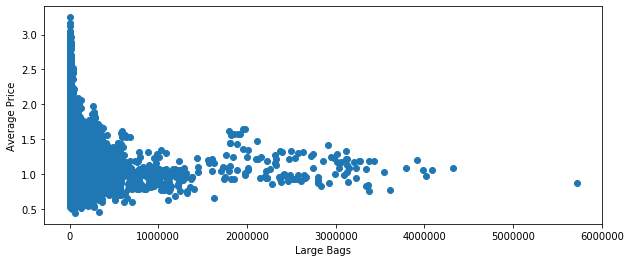

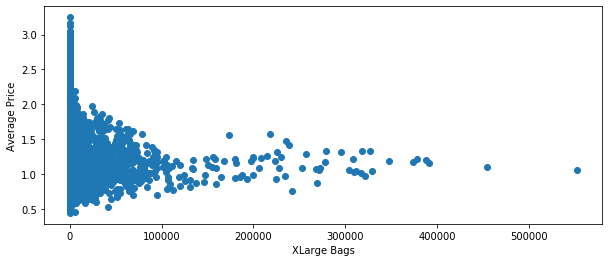

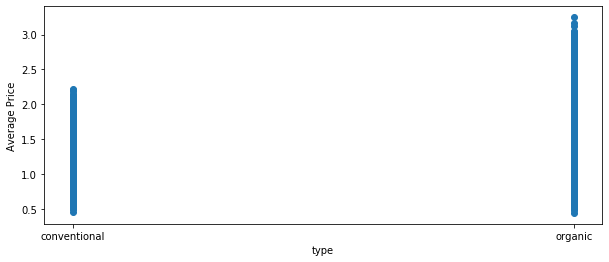

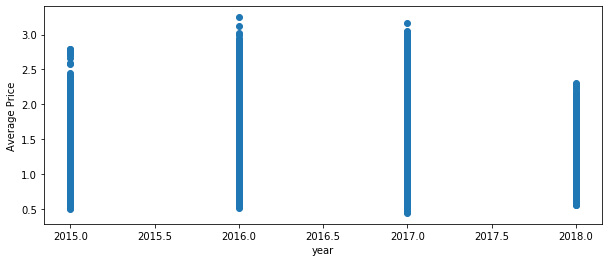

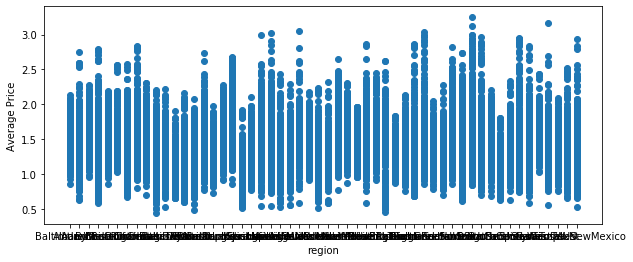

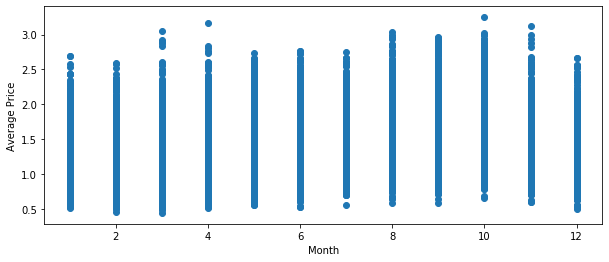

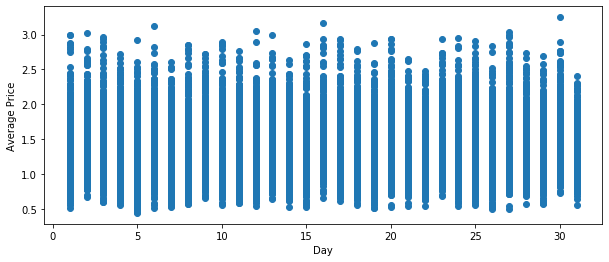

In [84]:
for i in ds.columns:
    plt.figure(figsize=(10,4))
    plt.scatter(ds[i],ds['AveragePrice'])
    plt.xlabel(i)
    plt.ylabel('Average Price')
    plt.show()

The highest average price was in 2016 and somewhat in 2017 also.
Less the total volume high the average price.
Same situation for 4046,4225,4770 and bags also.
Organic type avocado has higher avearge price than conventional type.
Average price is greater in the month of 4,10 and 11.

### Multivariate Analysis

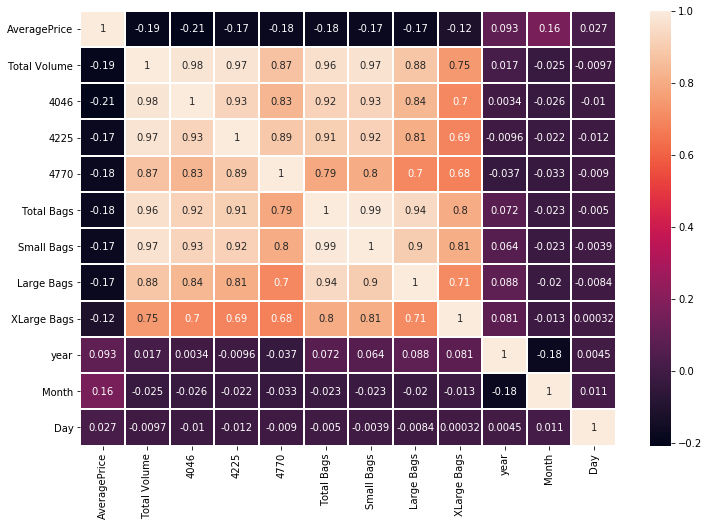

In [85]:
plt.figure(figsize=(12,8))
sns.heatmap(ds.corr(),annot=True,linewidth=1)

there are multicollinearity between maxmium columns with each other, such as :
TotalVolume with 4046,4225,4770,and every bags columns also.
And vice versa is true for every column which is mention above.

### Checking for the Outliers

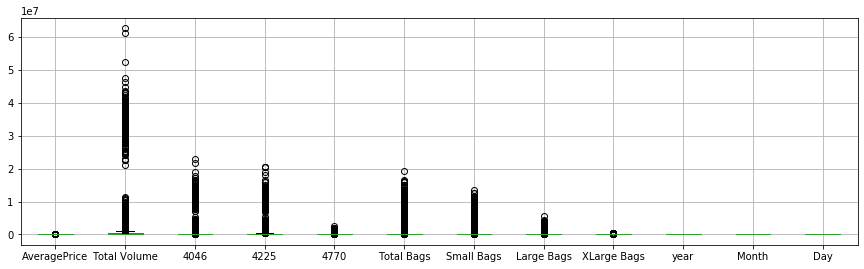

In [86]:
ds.boxplot(figsize=[15,5])
plt.subplots_adjust(bottom=.25)
plt.show()

Almost every columns has outliers, so lets try to remove it.

We tried zscore and IQR method to remove the outliers but we could not remove much outliers so now, we are going to use capping.

In [87]:
ds1=ds.copy()

In [88]:
ds1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


### Capping the outliers using IQR

In [89]:
def iqr_cap(df,cols,factor):
    for col in cols:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        up_wsk=q3+(factor*iqr)
        lw_wsk=q1-(factor*iqr)
        df[col]=np.where(df[col]>up_wsk, up_wsk, np.where(df[col]<lw_wsk, lw_wsk, df[col]))

In [90]:
ls=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
iqr_cap(ds1,ls,1.5)

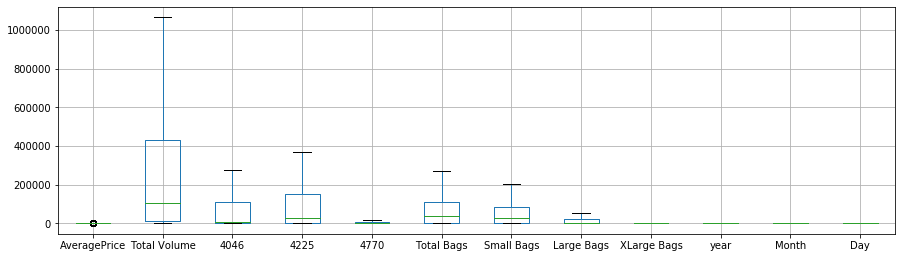

In [91]:
ds1.boxplot(figsize=[15,5])
plt.subplots_adjust(bottom=.25)
plt.show()

now,we can proceed further

In [92]:
ds1.skew()

AveragePrice    0.580303
Total Volume    1.206542
4046            1.251184
4225            1.219271
4770            1.212184
Total Bags      1.158550
Small Bags      1.186103
Large Bags      1.215301
XLarge Bags     1.175351
year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

All the columns are skewed except year, month and day. we try to remove it.

In [93]:
from sklearn.preprocessing import PowerTransformer

In [94]:
pt=PowerTransformer(method='yeo-johnson',standardize=True)

for i in ds1.iloc[:,2:10].columns:
    ds1[i]=pt.fit_transform(ds1[i].values.reshape(-1,1))

In [95]:
ds1.skew()

AveragePrice    0.580303
Total Volume   -0.084632
4046           -0.122462
4225           -0.135710
4770           -0.045993
Total Bags     -0.130493
Small Bags     -0.165210
Large Bags     -0.213020
XLarge Bags     0.742922
year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

Almost all the skeness has been removed. We did not apply skewness removal on target variable.

In [96]:
ds1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,-0.146630,-0.737354,0.347372,-0.286648,-0.637273,-0.439968,-0.865408,-0.707352,conventional,2015,Albany,12,27
1,2015-12-20,1.35,-0.222763,-0.854694,0.252614,-0.238316,-0.597400,-0.400911,-0.855736,-0.707352,conventional,2015,Albany,12,20
2,2015-12-13,0.93,0.159021,-0.810504,0.700997,-0.031424,-0.666267,-0.469014,-0.843393,-0.707352,conventional,2015,Albany,12,13
3,2015-12-06,1.08,-0.044956,-0.712712,0.485012,-0.182731,-0.810639,-0.613085,-0.785138,-0.707352,conventional,2015,Albany,12,6
4,2015-11-29,1.28,-0.257435,-0.764111,0.244122,-0.171705,-0.784680,-0.591781,-0.693490,-0.707352,conventional,2015,Albany,11,29


In [97]:
ds2=ds1.drop('Date',axis=1)   # we already extracted all the information from date column so we can drop it.

In [98]:
ds2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.146630,-0.737354,0.347372,-0.286648,-0.637273,-0.439968,-0.865408,-0.707352,conventional,2015,Albany,12,27
1,1.35,-0.222763,-0.854694,0.252614,-0.238316,-0.597400,-0.400911,-0.855736,-0.707352,conventional,2015,Albany,12,20
2,0.93,0.159021,-0.810504,0.700997,-0.031424,-0.666267,-0.469014,-0.843393,-0.707352,conventional,2015,Albany,12,13
3,1.08,-0.044956,-0.712712,0.485012,-0.182731,-0.810639,-0.613085,-0.785138,-0.707352,conventional,2015,Albany,12,6
4,1.28,-0.257435,-0.764111,0.244122,-0.171705,-0.784680,-0.591781,-0.693490,-0.707352,conventional,2015,Albany,11,29


### Spliting the data into train and test

In [99]:
x=ds2.drop('AveragePrice',axis=1)
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.146630,-0.737354,0.347372,-0.286648,-0.637273,-0.439968,-0.865408,-0.707352,conventional,2015,Albany,12,27
1,-0.222763,-0.854694,0.252614,-0.238316,-0.597400,-0.400911,-0.855736,-0.707352,conventional,2015,Albany,12,20
2,0.159021,-0.810504,0.700997,-0.031424,-0.666267,-0.469014,-0.843393,-0.707352,conventional,2015,Albany,12,13
3,-0.044956,-0.712712,0.485012,-0.182731,-0.810639,-0.613085,-0.785138,-0.707352,conventional,2015,Albany,12,6
4,-0.257435,-0.764111,0.244122,-0.171705,-0.784680,-0.591781,-0.693490,-0.707352,conventional,2015,Albany,11,29


In [100]:
y=ds2['AveragePrice'].copy()
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

### Feature Engineering and Encoding

In [101]:
from sklearn.preprocessing import OrdinalEncoder

In [102]:
oe=OrdinalEncoder()

In [103]:
x['type']=oe.fit_transform(x['type'].values.reshape(-1,1))
x['region']=oe.fit_transform(x['region'].values.reshape(-1,1))

In [104]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.146630,-0.737354,0.347372,-0.286648,-0.637273,-0.439968,-0.865408,-0.707352,0.0,2015,0.0,12,27
1,-0.222763,-0.854694,0.252614,-0.238316,-0.597400,-0.400911,-0.855736,-0.707352,0.0,2015,0.0,12,20
2,0.159021,-0.810504,0.700997,-0.031424,-0.666267,-0.469014,-0.843393,-0.707352,0.0,2015,0.0,12,13
3,-0.044956,-0.712712,0.485012,-0.182731,-0.810639,-0.613085,-0.785138,-0.707352,0.0,2015,0.0,12,6
4,-0.257435,-0.764111,0.244122,-0.171705,-0.784680,-0.591781,-0.693490,-0.707352,0.0,2015,0.0,11,29


In [105]:
#x=pd.get_dummies(x,columns=['type','year'])

In [106]:
#x.head()

### Scaling of data

In [107]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [108]:
x_new=mm.fit_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)
x_new.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0.606212,0.393771,0.713648,0.377037,0.495981,0.497432,0.252450,0.0,0.0,0.0,0.0,1.000000,0.866667
1,0.587038,0.360226,0.688252,0.396103,0.505640,0.507845,0.255726,0.0,0.0,0.0,0.0,1.000000,0.633333
2,0.683188,0.372859,0.808421,0.477714,0.488957,0.489688,0.259907,0.0,0.0,0.0,0.0,1.000000,0.400000
3,0.631818,0.400816,0.750536,0.418029,0.453985,0.451276,0.279639,0.0,0.0,0.0,0.0,1.000000,0.166667
4,0.578306,0.386122,0.685976,0.422378,0.460274,0.456956,0.310681,0.0,0.0,0.0,0.0,0.909091,0.933333


In [109]:
x1=x_new.copy()
x1=x1.drop(columns=['Total Bags'],axis=1) 

### Finding the best random State

In [113]:
maxacc=0
maxrs=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_sc=r2_score(y_test,pred)
    if r2_sc>maxacc:
        maxacc=r2_sc
        maxrs=i
print('best r2_sc is:',maxacc,' at random state', maxrs)

best r2_sc is: 0.570847725276244  at random state 189


In [114]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.25,random_state=189)

In [115]:
x_train.shape

(13686, 12)

In [116]:
x_test.shape

(4563, 12)

In [117]:
y_train.shape

(13686,)

In [118]:
y_test.shape

(4563,)

### Model Training

In [119]:
lr=LinearRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(r2_score(y_test,predlr))
print(np.sqrt(mean_squared_error(y_test,predlr)))
crs=cross_val_score(lr,x1,y,cv=5)
print(crs.mean())

0.570847725276244
0.2635704939635886
0.18238967538730505


### Regularization

In [120]:
# lasso

ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print(r2_score(y_test,predls))
print(np.sqrt(mean_squared_error(y_test,predls)))
crs=cross_val_score(ls,x1,y,cv=3)
print(crs.mean())

0.5702201668308894
0.26376313591635403
0.1852038594196502


In [121]:
# Ridge

rg=Ridge()
rg.fit(x_train,y_train)
predrg=rg.predict(x_test)
print(r2_score(y_test,predrg))
print(np.sqrt(mean_squared_error(y_test,predrg)))
crs=cross_val_score(rg,x1,y,cv=3)
print(crs.mean())

0.5701803550949278
0.2637753522005337
0.18510151137552877


In [122]:
# ElasticNet

el=ElasticNet(alpha=0.0001)
el.fit(x_train,y_train)
predel=el.predict(x_test)
print(r2_score(y_test,predel))
print(np.sqrt(mean_squared_error(y_test,predel)))
crs=cross_val_score(el,x1,y,cv=3)
print(crs.mean())

0.5700532971434773
0.2638143363184689
0.18449887998722514


In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [124]:
rfr=RandomForestRegressor()
etr=ExtraTreesRegressor()
gbr=GradientBoostingRegressor()
xgr=XGBRegressor()

In [125]:
model=[rfr,etr,gbr,xgr]

for i in model:
    print('model:',i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(r2_score(y_test,pred))
    print(np.sqrt(mean_squared_error(y_test,pred)))
    crs=cross_val_score(i,x1,y,cv=5)
    print(crs.mean())
    print('\n')

model: RandomForestRegressor()
0.8902711733002959
0.13327584624453942
0.20404138292357263


model: ExtraTreesRegressor()
0.9149371807048384
0.1173440213887655
0.26054452326474153


model: GradientBoostingRegressor()
0.7514819790587683
0.20057187032970894
0.3797813434652596


model: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
0.8984163647049253
0.12823393117957016
0.41428091692187596




among all random forest is more overfitted,therefore we use rest of the model for hyperparameter tuning.

### Hyper parameter tunning using GridSearchCV

In [126]:
# extra tree regressor

par={'n_estimators':(100,150,200),'criterion':['mse','mae'],'bootstrap':['True'],'max_depth':range(0,8,2)}
gcv=GridSearchCV(etr,par,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': ['True'], 'criterion': ['mse', 'mae'],
                         'max_depth': range(0, 8, 2),
                         'n_estimators': (100, 150, 200)})

In [127]:
gcv.best_params_

{'bootstrap': 'True', 'criterion': 'mse', 'max_depth': 6, 'n_estimators': 200}

In [140]:
et=ExtraTreesRegressor(criterion='mse',n_estimators=200,max_depth=8,bootstrap=True,max_features='auto')
et.fit(x_train,y_train)
predet=et.predict(x_test)
print(r2_score(y_test,predet))
print(np.sqrt(mean_squared_error(y_test,predet)))

0.739158649728713
0.20548461022233733


In [141]:
# gradient boosting regressor

par={'n_estimators':(100,150,200),'learning_rate':[0.001,0.01,0.1],'max_depth':range(0,10,2),'min_samples_split':range(0,5)}
gcv=GridSearchCV(gbr,par,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': range(0, 10, 2),
                         'min_samples_split': range(0, 5),
                         'n_estimators': (100, 150, 200)})

In [142]:
gcv.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_samples_split': 2,
 'n_estimators': 200}

In [145]:
gb=GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,max_depth=8,min_samples_split=2)
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(r2_score(y_test,predgb))
print(np.sqrt(mean_squared_error(y_test,predgb)))

0.9154564225339628
0.1169853265321655


In [146]:
# xgb regressor

par={'n_estimators':[100,150,200],'max_depth':range(0,10,2),'learning_rate':(0.001,0.01,0.1)}
gcv=GridSearchCV(xgr,par,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [147]:
gcv.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}

In [148]:
xg=XGBRegressor(max_depth=8,n_estimators=200,learning_rate=0.1)
xg.fit(x_train,y_train)
predxg=xg.predict(x_test)
print(r2_score(y_test,predxg))
print(np.sqrt(mean_squared_error(y_test,predxg)))

0.9190464451295671
0.1144745759131338


from above model highest r2score is of xgbregressor and lowest RMSE also. So we can choose our best model as xgbregressor.

### Saving our Model

I tried many ways to solve this problem but I could not get desire ouput, this is the my better approach among them so I choose this and now going to save the model.

In [149]:
import joblib

In [150]:
joblib.dump(xg,'avocado_xgbr.obj')

['avocado_xgbr.obj']